In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

os.chdir('../data/train/')

In [6]:
train = pd.read_csv('train_ratings.csv')
directors = pd.read_csv('directors.tsv', sep='\t')
genres = pd.read_csv('genres.tsv', sep='\t')
titles = pd.read_csv('titles.tsv', sep='\t')
writers = pd.read_csv('writers.tsv', sep='\t')
years = pd.read_csv('years.tsv', sep='\t')

In [7]:
data = pd.merge(directors, genres, on='item', how='left')[['director', 'genre']].value_counts()
index = 1
for d in directors.director.unique() :
    print(f"{d}_{data[d]}")
    if index > 5 :
        break
    index += 1

nm0000005_genre
Drama      17
Romance     3
Comedy      2
Fantasy     2
War         1
Mystery     1
Musical     1
Horror      1
Crime       1
dtype: int64
nm0000019_genre
Drama      9
Fantasy    2
Comedy     2
Romance    1
dtype: int64
nm0000033_genre
Thriller     29
Mystery      16
Drama        15
Romance       9
Crime         7
Film-Noir     5
Comedy        3
Adventure     2
Horror        2
War           1
Action        1
dtype: int64
nm0000036_genre
Comedy     8
Romance    3
War        1
Fantasy    1
Drama      1
dtype: int64
nm0000037_genre
Musical        3
Comedy         3
Romance        3
Documentary    1
dtype: int64
nm0000040_genre
Drama        8
War          5
Crime        3
Romance      3
Thriller     2
Sci-Fi       2
Film-Noir    2
Mystery      1
Horror       1
Comedy       1
Adventure    1
Action       1
dtype: int64


In [8]:
data = pd.merge(directors, years, on='item', how='left').groupby('director').apply(lambda x : sorted(x['year'].values))
data['nm0000005']

[1953.0,
 1955.0,
 1957.0,
 1957.0,
 1958.0,
 1960.0,
 1961.0,
 1963.0,
 1963.0,
 1966.0,
 1968.0,
 1968.0,
 1969.0,
 1972.0,
 1973.0,
 1975.0,
 1978.0,
 1982.0,
 2003.0]

In [9]:
df = train.item.value_counts().to_frame().reset_index()
df.columns = ['item', 'count']
df

,item,count
0,2571,19699
1,2959,18437
2,296,18202
3,318,18168
4,356,17339
...,...,...
6802,7259,38
6803,126,36
6804,4241,34
6805,2555,34


In [10]:
df = pd.merge(df, titles, on='item', how='left')
df

,item,count,title
0,2571,19699,"Matrix, The (1999)"
1,2959,18437,Fight Club (1999)
2,296,18202,Pulp Fiction (1994)
3,318,18168,"Shawshank Redemption, The (1994)"
4,356,17339,Forrest Gump (1994)
...,...,...,...
6802,7259,38,You Got Served (2004)
6803,126,36,"NeverEnding Story III, The (1994)"
6804,4241,34,Pokémon 3: The Movie (2001)
6805,2555,34,Baby Geniuses (1999)


In [11]:
df = pd.merge(df, years, on='item', how='left')
df['group_year'] = df['year'].apply(lambda x : x // 5 * 5)
df

,item,count,title,year,group_year
0,2571,19699,"Matrix, The (1999)",1999.0,1995.0
1,2959,18437,Fight Club (1999),1999.0,1995.0
2,296,18202,Pulp Fiction (1994),1994.0,1990.0
3,318,18168,"Shawshank Redemption, The (1994)",1994.0,1990.0
4,356,17339,Forrest Gump (1994),1994.0,1990.0
...,...,...,...,...,...
6802,7259,38,You Got Served (2004),2004.0,2000.0
6803,126,36,"NeverEnding Story III, The (1994)",1994.0,1990.0
6804,4241,34,Pokémon 3: The Movie (2001),2001.0,2000.0
6805,2555,34,Baby Geniuses (1999),1999.0,1995.0


In [12]:
df_g = pd.merge(df, genres, on='item')[['genre', 'year']].value_counts().to_frame().reset_index()
df_g.columns = ['genre', 'year', 'count']
df_g['group_year'] = df_g['year'].apply(lambda x : x // 5 * 5)
df_g

,genre,year,count,group_year
0,Drama,2006.0,157,2005.0
1,Drama,2005.0,149,2005.0
2,Drama,2007.0,144,2005.0
3,Drama,2004.0,139,2000.0
4,Drama,2009.0,134,2005.0
...,...,...,...,...
1350,Film-Noir,2006.0,1,2005.0
1351,Film-Noir,2003.0,1,2000.0
1352,Film-Noir,2001.0,1,2000.0
1353,Film-Noir,1998.0,1,1995.0


In [15]:
count = df_g['year'].value_counts()
count

2006.0    18
2011.0    18
1988.0    18
1989.0    18
1990.0    18
          ..
1924.0     6
1929.0     6
1922.0     6
1926.0     5
1923.0     3
Name: year, Length: 93, dtype: int64

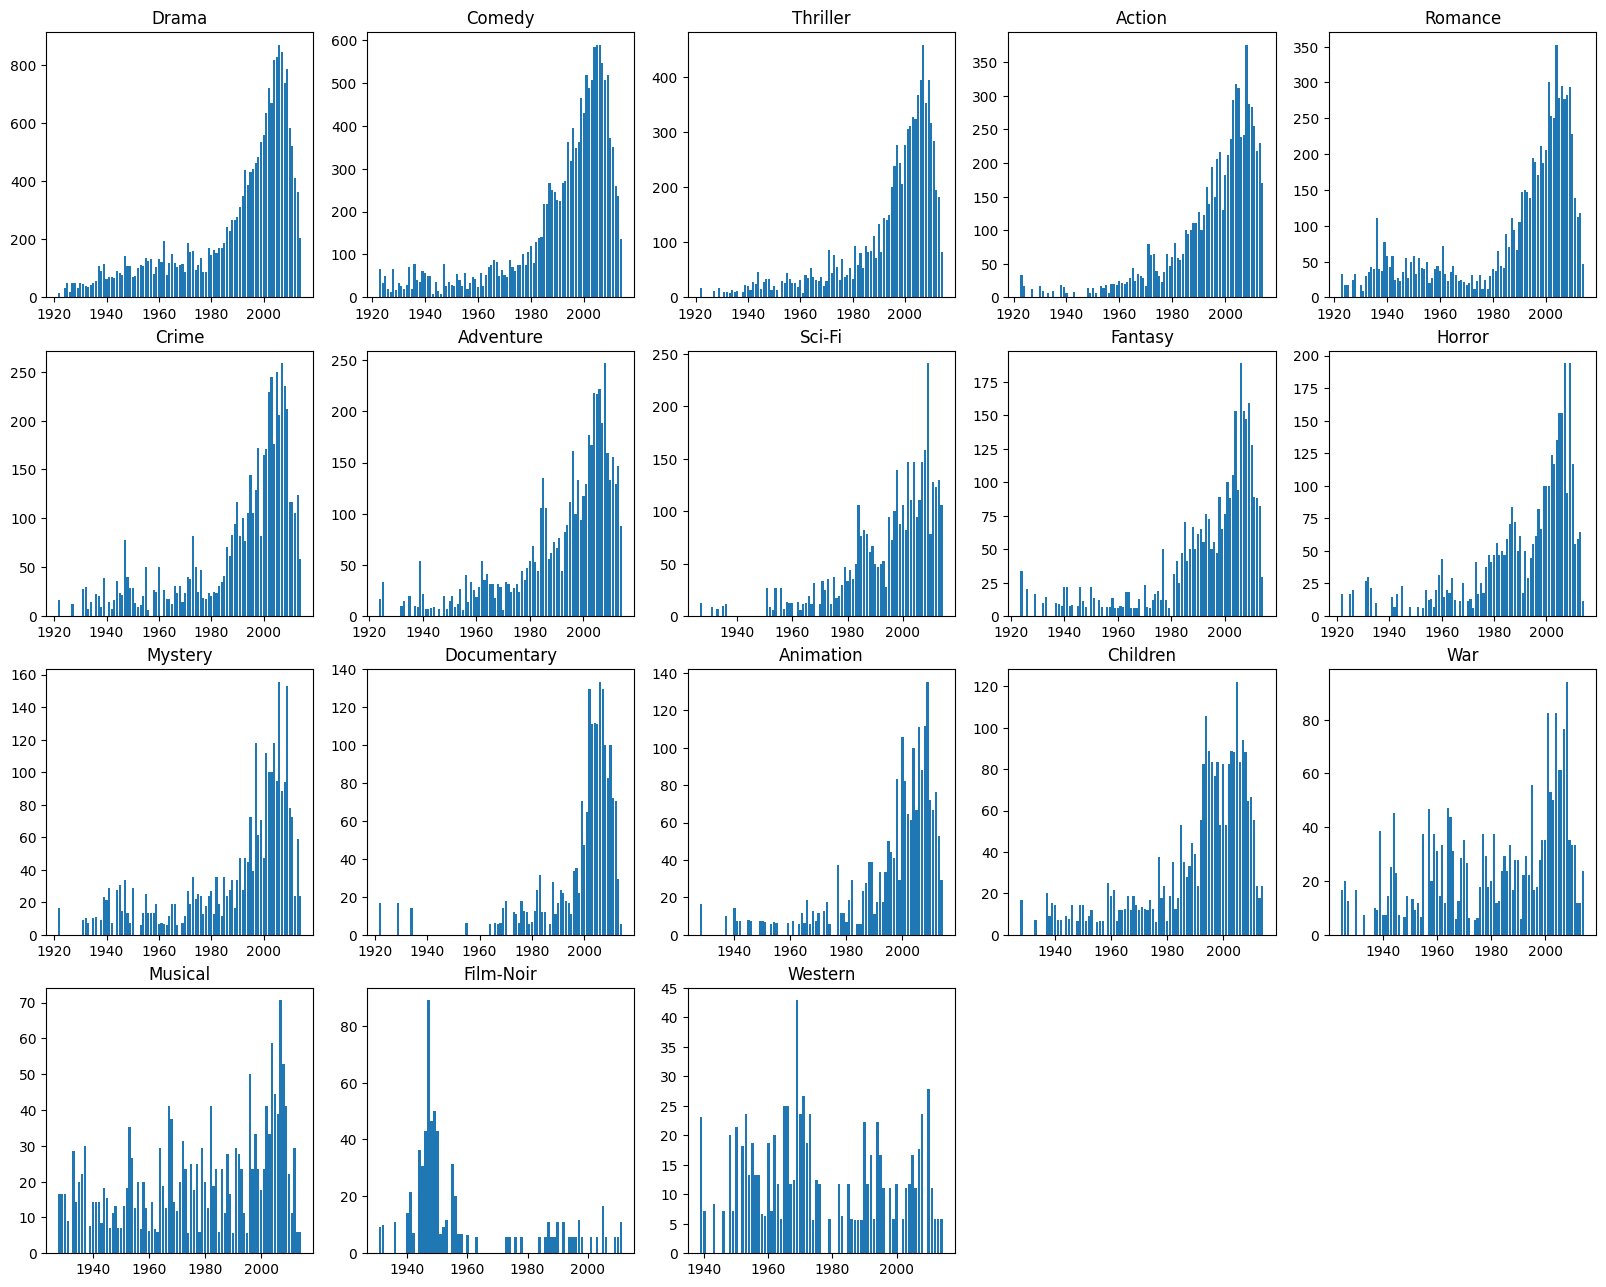

In [16]:
df_g['z'] = df_g.apply(lambda x : x[2] / count[x[1]] * 100, axis=1)
df_g.sort_values('z')
plt.figure(figsize=(20,20))
index = 1
for g in df_g.genre.unique() :
    plt.subplot(5,5, index)
    d = df_g[df_g.genre == g][['year', 'z']]
    plt.bar(d['year'], d['z'])
    plt.title(g)
    index += 1

In [20]:
tmp = df_g.groupby(['genre', 'group_year'])['count'].sum().to_frame().reset_index()
tmp

,genre,group_year,count
0,Action,1920.0,2
1,Action,1925.0,1
2,Action,1930.0,3
3,Action,1935.0,5
4,Action,1940.0,2
...,...,...,...
318,Western,1990.0,14
319,Western,1995.0,8
320,Western,2000.0,7
321,Western,2005.0,12


In [21]:
count_year = tmp.groupby('group_year')['count'].sum()
count_year

group_year
1920.0      19
1925.0      47
1930.0      97
1935.0     172
1940.0     203
1945.0     238
1950.0     252
1955.0     322
1960.0     362
1965.0     381
1970.0     467
1975.0     477
1980.0     649
1985.0    1116
1990.0    1363
1995.0    1969
2000.0    2726
2005.0    3295
2010.0    1759
Name: count, dtype: int64

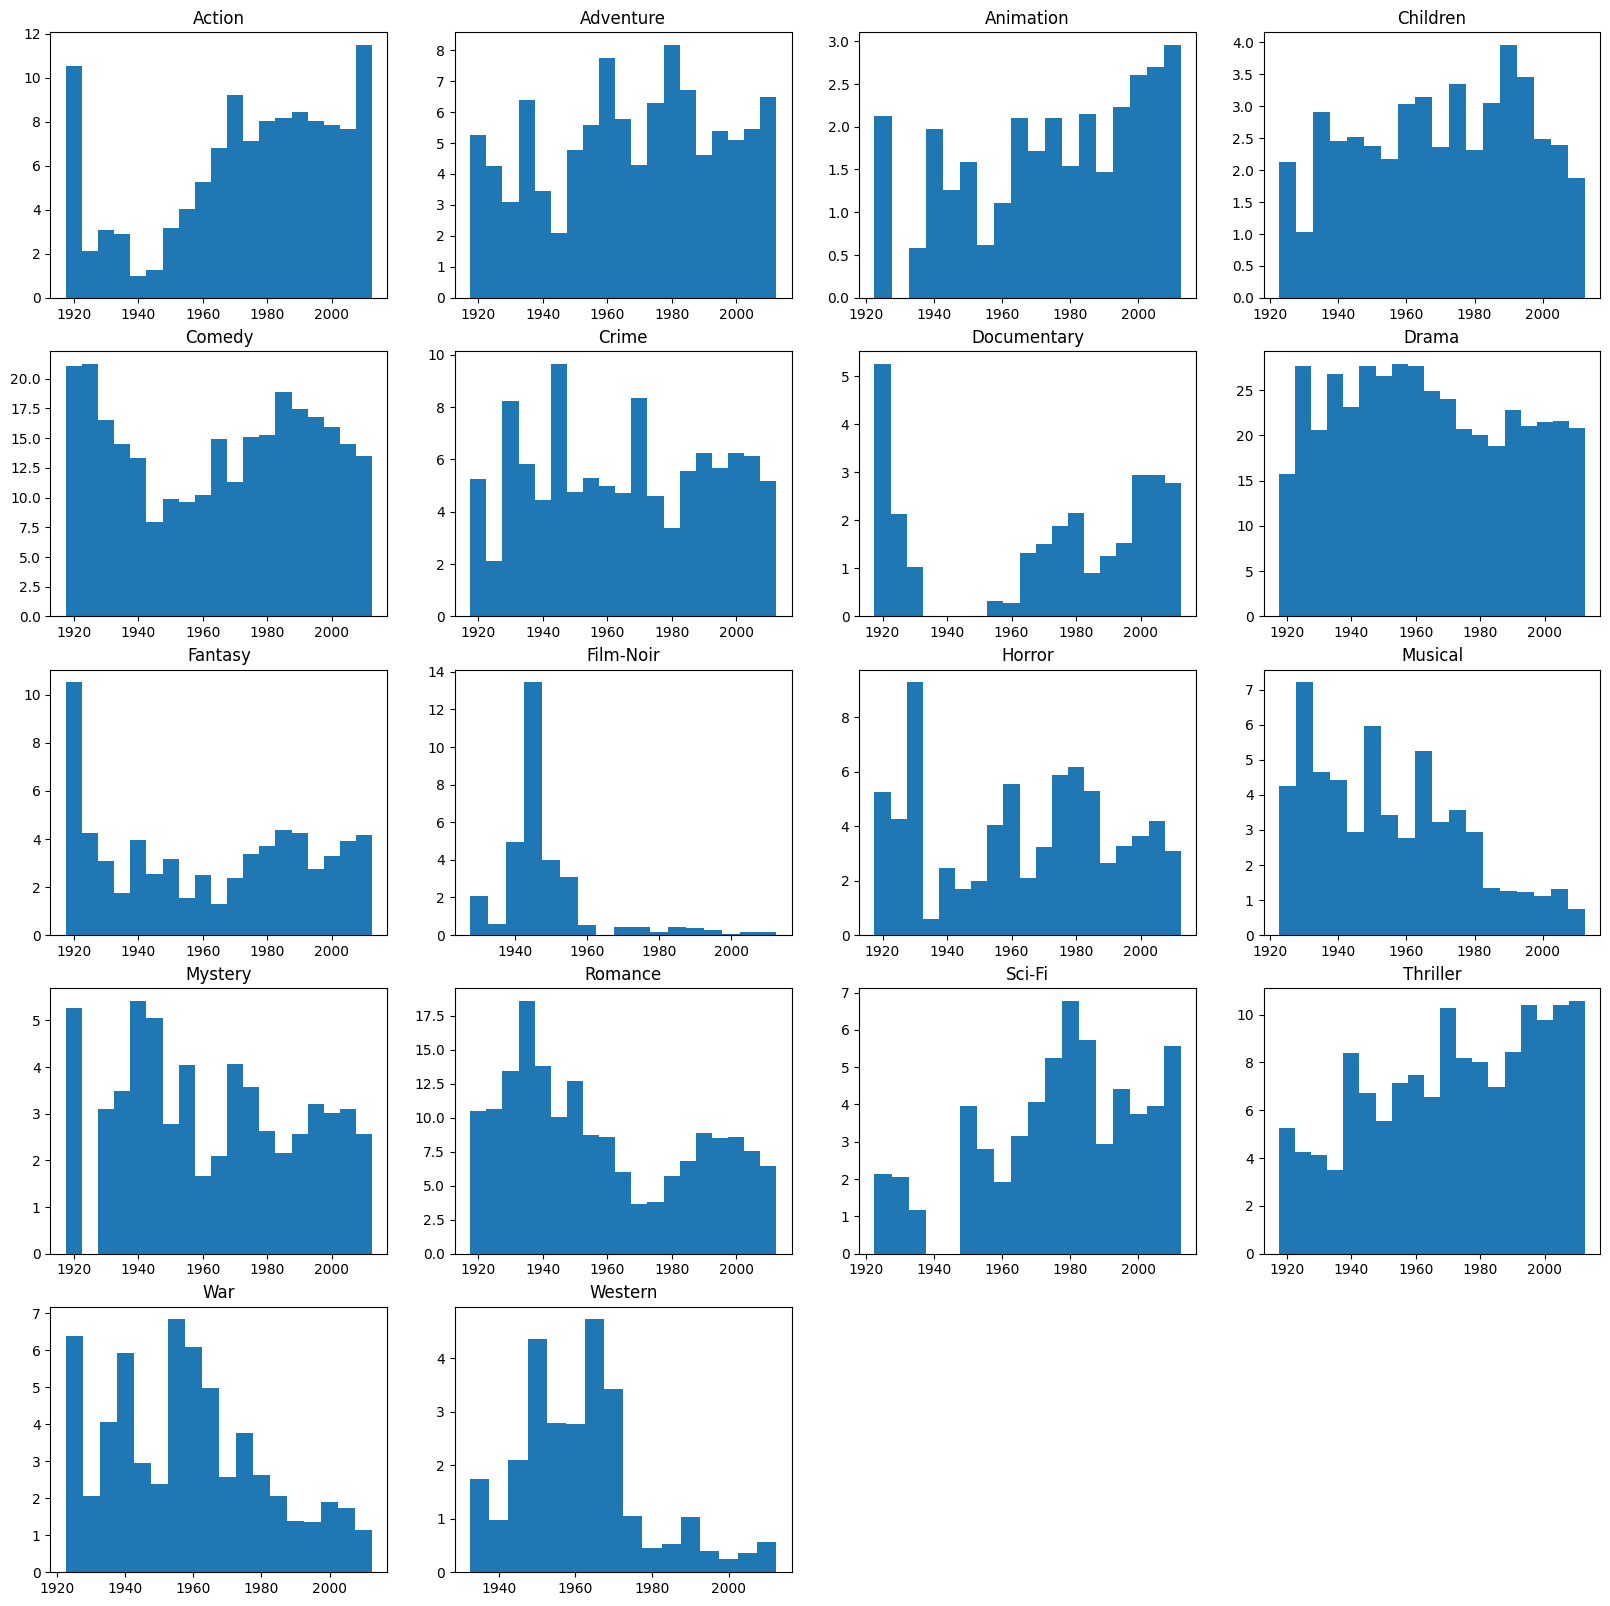

In [25]:
tmp['z'] = tmp.apply(lambda x : x[2] / count_year[x[1]] * 100, axis=1)
tmp.sort_values('z')
plt.figure(figsize=(20,20))
index = 1
for g in tmp.genre.unique() :
    plt.subplot(5,4, index)
    d = tmp[tmp.genre == g][['group_year', 'z']]
    plt.bar(d['group_year'], d['z'], width=5)
    plt.title(g)
    index += 1
#plt.legend(tmp.genre.unique())

In [ ]:
a = pd.merge(count, genres, on='item').groupby(['genre', 'year'])['count'].mean().to_frame().reset_index()
a

,genre,year,count
0,Action,1923.0,217.0
1,Action,1924.0,77.0
2,Action,1927.0,50.0
3,Action,1930.0,606.0
4,Action,1931.0,252.0
...,...,...,...
1350,Western,2010.0,573.4
1351,Western,2011.0,543.5
1352,Western,2012.0,2979.0
1353,Western,2013.0,143.0


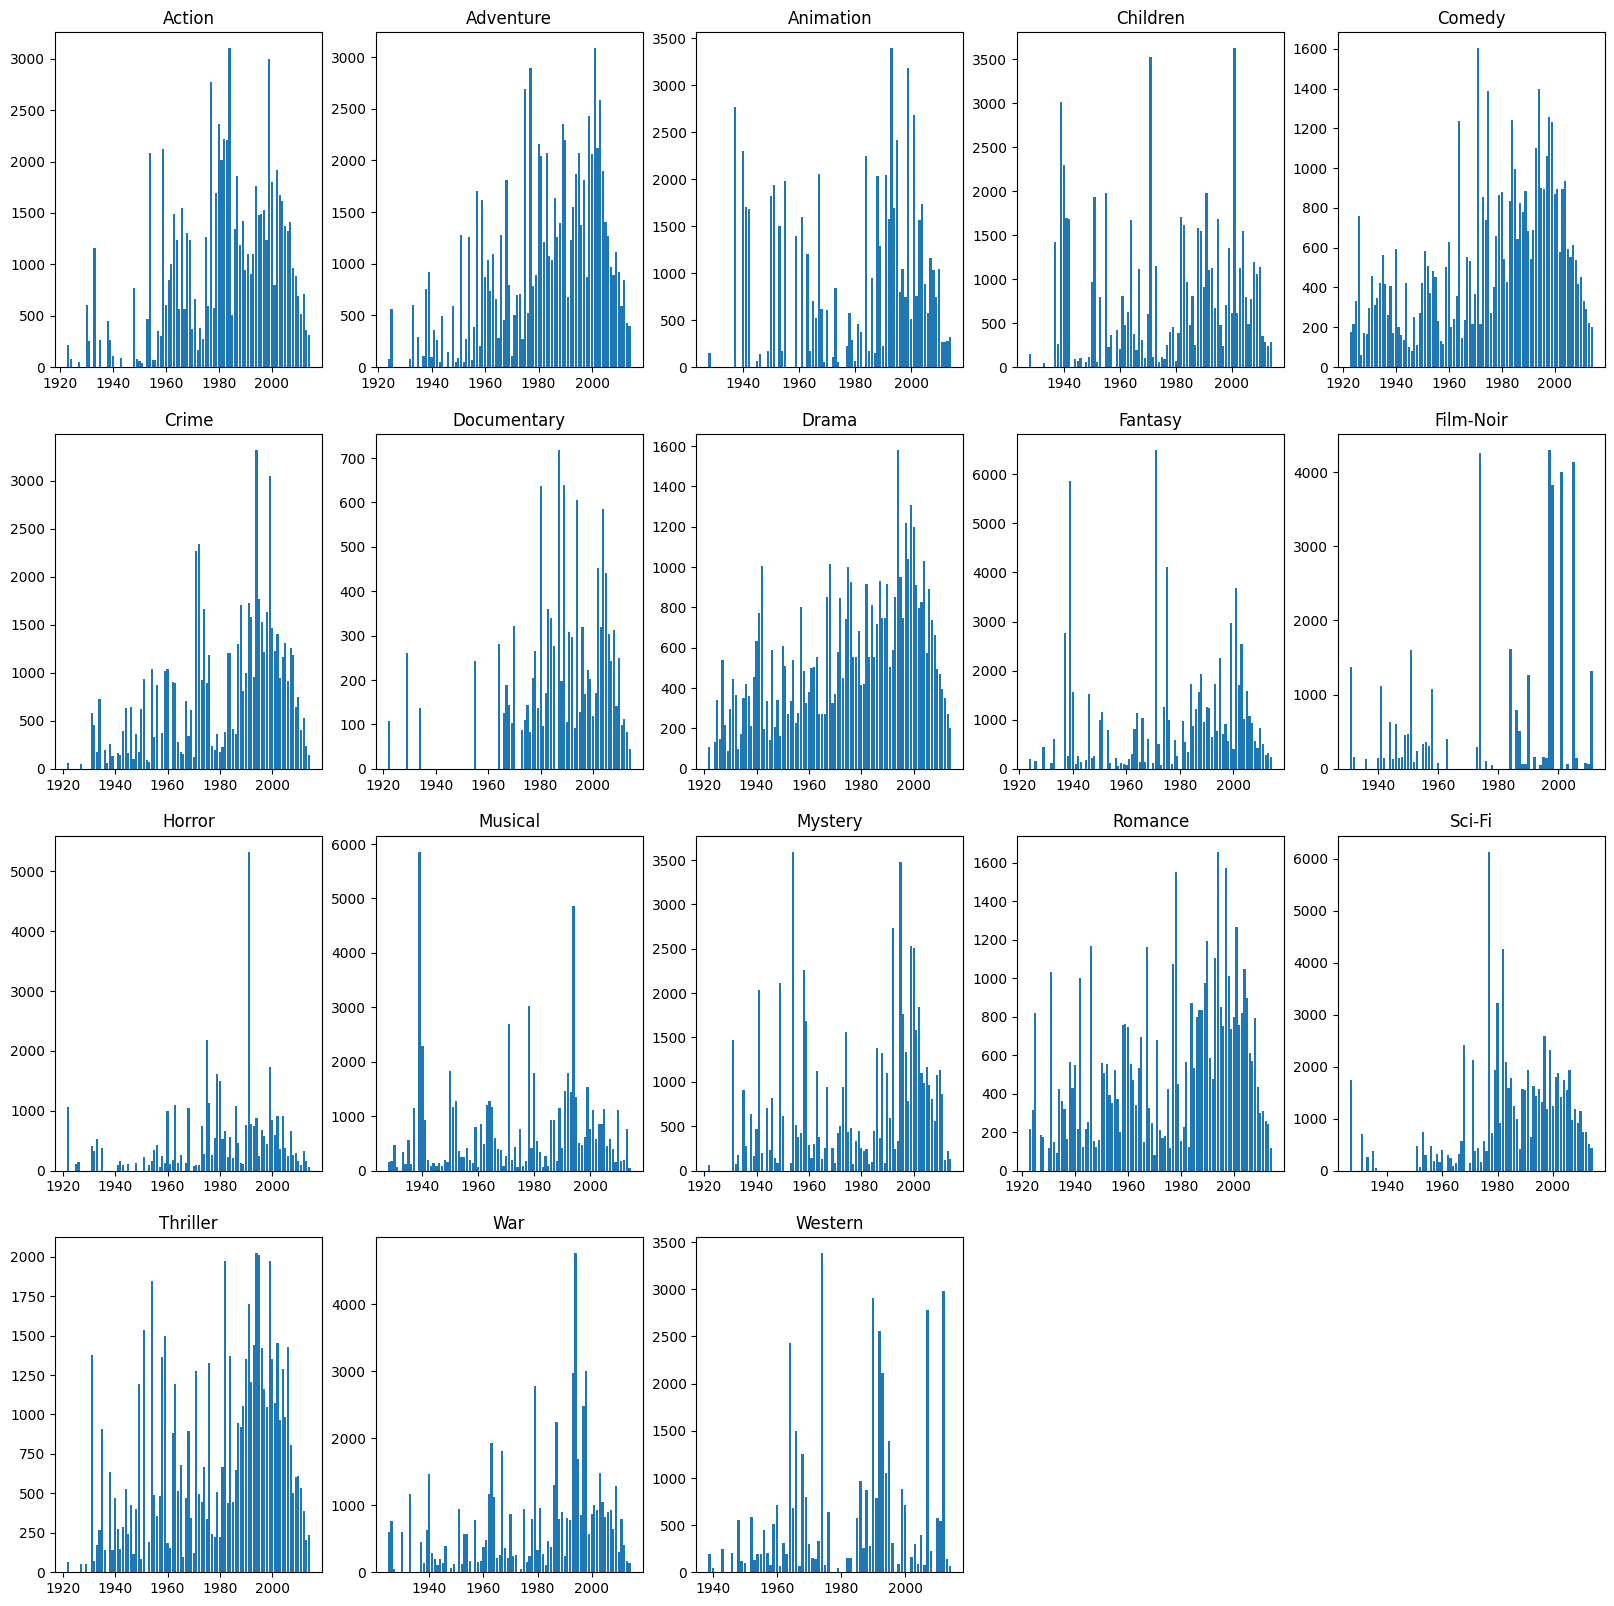

In [97]:
plt.figure(figsize=(20, 20))
index = 1
for g in a.genre.unique() :
    d = a[a.genre == g][['year', 'count']]
    plt.subplot(4, 5, index)
    plt.bar(d.year, d['count'])
    plt.title(g)
    index += 1

In [102]:
a = pd.merge(count, genres, on='item').groupby(['genre', 'group_year'])['count'].mean().to_frame().reset_index()
a

,genre,group_year,count
0,Action,1920.0,147.000000
1,Action,1925.0,50.000000
2,Action,1930.0,672.666667
3,Action,1935.0,337.600000
4,Action,1940.0,98.000000
...,...,...,...
318,Western,1990.0,1944.500000
319,Western,1995.0,730.375000
320,Western,2000.0,338.000000
321,Western,2005.0,884.333333


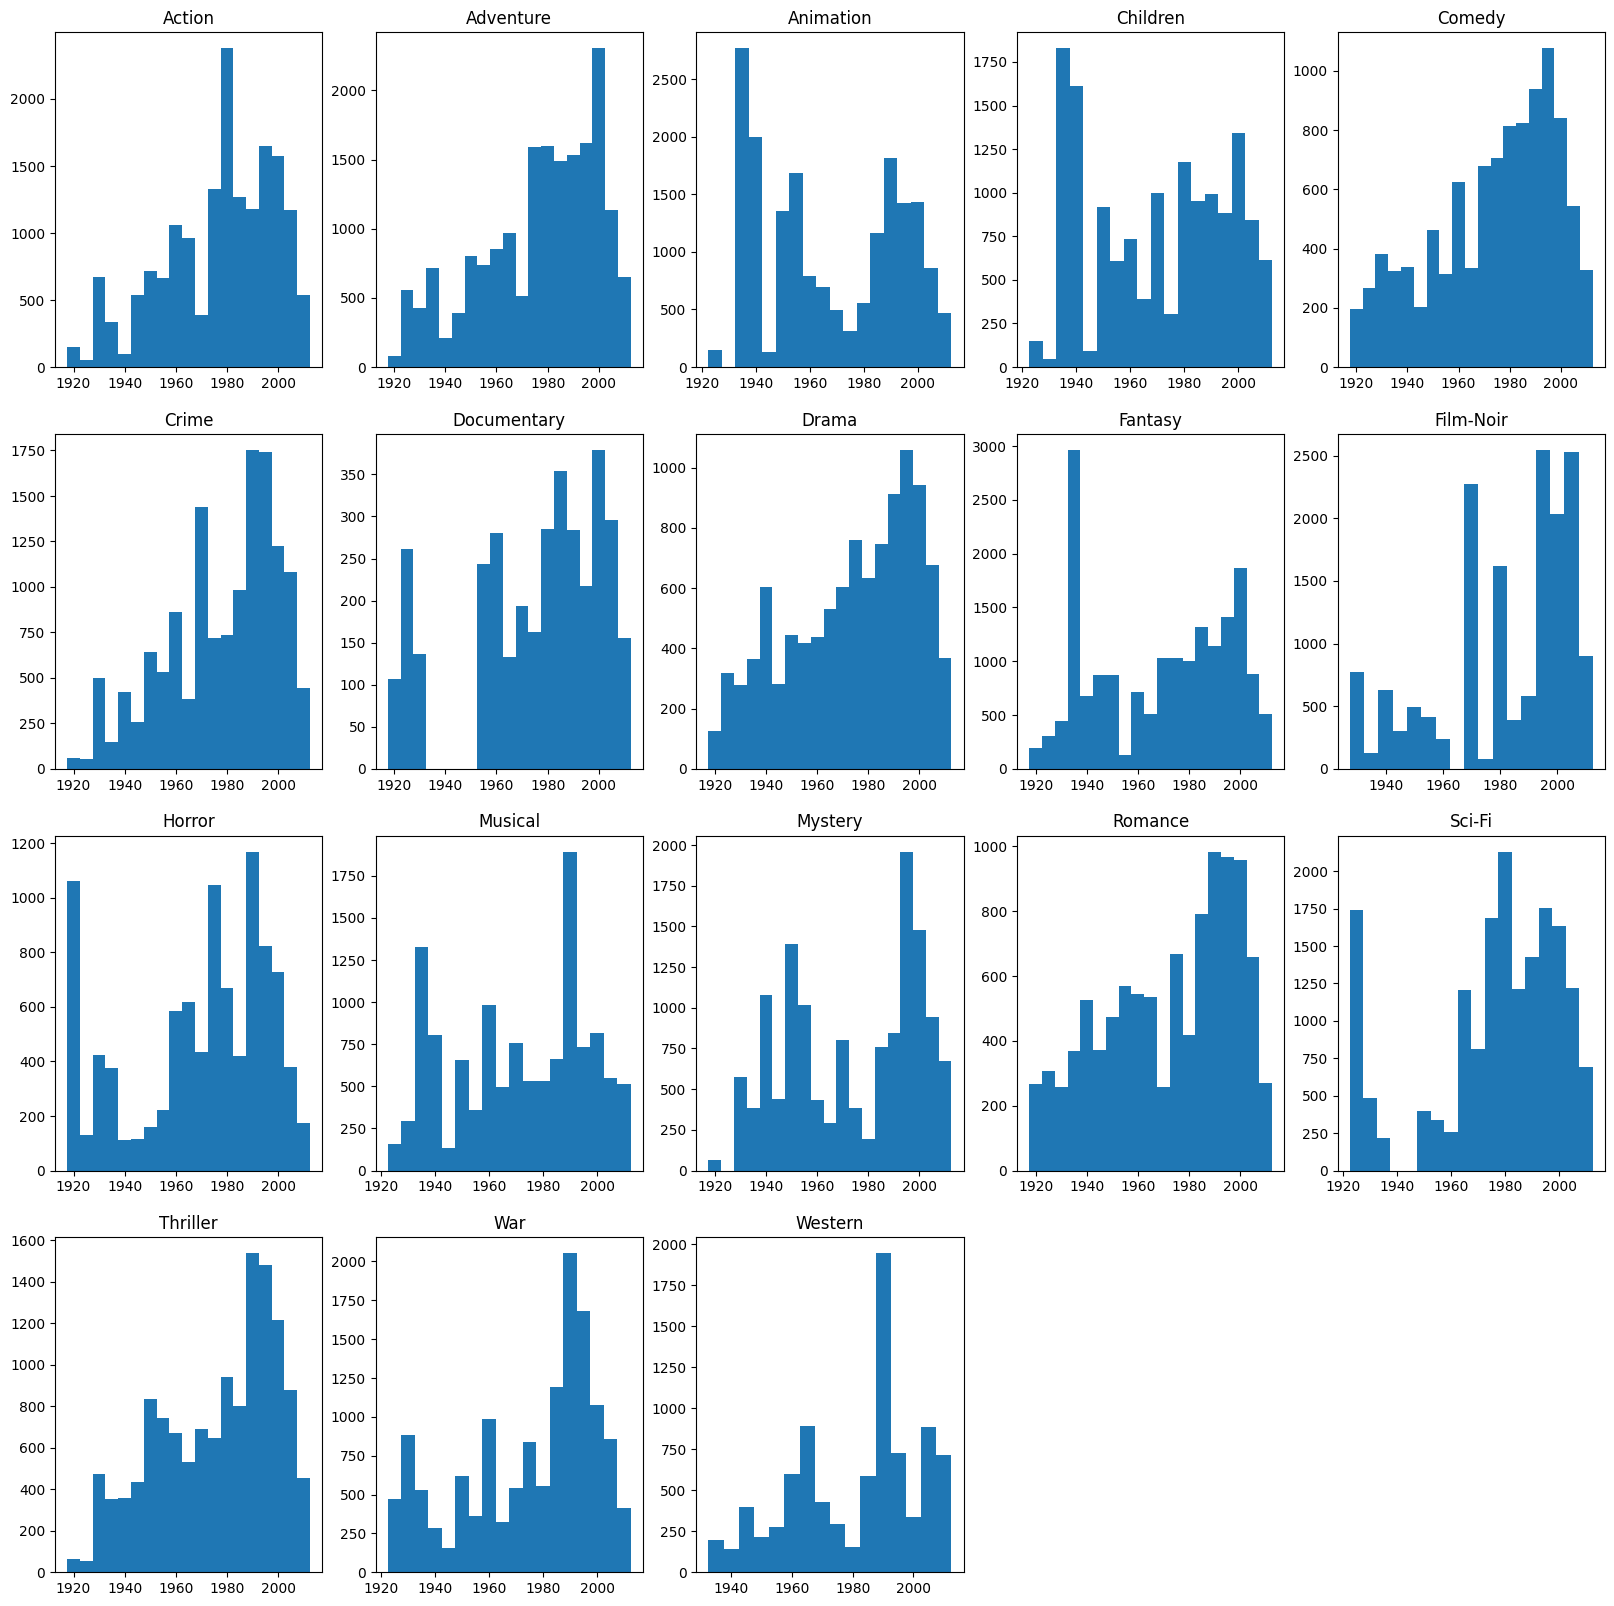

In [104]:
plt.figure(figsize=(20, 20))
index = 1
for g in a.genre.unique() :
    d = a[a.genre == g][['group_year', 'count']]
    plt.subplot(4, 5, index)
    plt.bar(d.group_year, d['count'], width=5)
    plt.title(g)
    index += 1

In [31]:
b = pd.merge(directors, genres, on='item')[['director', 'genre']].value_counts()
data = {}
for g in directors.director.unique() :
    data[g] = b[g].index[0]
data

{'nm0000005': 'Drama',
 'nm0000019': 'Drama',
 'nm0000033': 'Thriller',
 'nm0000036': 'Comedy',
 'nm0000037': 'Musical',
 'nm0000040': 'Drama',
 'nm0000041': 'Drama',
 'nm0000045': 'Action',
 'nm0000059': 'Drama',
 'nm0000076': 'Drama',
 'nm0000078': 'Western',
 'nm0000080': 'Drama',
 'nm0000095': 'Comedy',
 'nm0000108': 'Action',
 'nm0000110': 'Drama',
 'nm0000114': 'Drama',
 'nm0000116': 'Action',
 'nm0000118': 'Sci-Fi',
 'nm0000122': 'Comedy',
 'nm0000123': 'Drama',
 'nm0000126': 'Western',
 'nm0000127': 'Horror',
 'nm0000134': 'Drama',
 'nm0000142': 'Drama',
 'nm0000149': 'Drama',
 'nm0000154': 'Drama',
 'nm0000158': 'Drama',
 'nm0000165': 'Drama',
 'nm0000169': 'Drama',
 'nm0000180': 'Drama',
 'nm0000184': 'Sci-Fi',
 'nm0000186': 'Drama',
 'nm0000200': 'Drama',
 'nm0000209': 'Drama',
 'nm0000217': 'Drama',
 'nm0000229': 'Drama',
 'nm0000230': 'Action',
 'nm0000231': 'Drama',
 'nm0000233': 'Thriller',
 'nm0000243': 'Drama',
 'nm0000247': 'Action',
 'nm0000255': 'Drama',
 'nm0000264

In [37]:
c = pd.merge(directors, genres, on='item')
c['major'] = c.apply(lambda x : 1 if x[2] == data[x[1]] else 0, axis=1)
c = c.groupby(['item', 'director']).major.max().to_frame().reset_index()
c = c.groupby('item').major.mean().to_frame().reset_index()
c

,item,major
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
5498,118696,1.0
5499,118900,1.0
5500,118997,1.0
5501,119141,1.0


In [50]:
d = pd.merge(df, c[['item', 'major']], on='item')
for i in range(1, 11) :
   d['pre_major'] = d['major'].apply(lambda x : 1 if 0.1*i <= x else 0)
   print(f"{0.1*i}", d.groupby('pre_major')['count'].mean())


0.1 pre_major
0    917.631991
1    874.954003
Name: count, dtype: float64
0.2 pre_major
0    917.631991
1    874.954003
Name: count, dtype: float64
0.30000000000000004 pre_major
0    917.427933
1    874.984375
Name: count, dtype: float64
0.4 pre_major
0    923.023411
1    873.876248
Name: count, dtype: float64
0.5 pre_major
0    923.023411
1    873.876248
Name: count, dtype: float64
0.6000000000000001 pre_major
0    946.669913
1    868.814807
Name: count, dtype: float64
0.7000000000000001 pre_major
0    942.304301
1    869.600481
Name: count, dtype: float64
0.8 pre_major
0    942.304301
1    869.600481
Name: count, dtype: float64
0.9 pre_major
0    942.000000
1    869.599037
Name: count, dtype: float64
1.0 pre_major
0    942.000000
1    869.599037
Name: count, dtype: float64


In [52]:
b = pd.merge(directors, genres, on='item')[['director', 'genre']].value_counts()
data = {}
for g in directors.director.unique() :
    if b[g].index[0] == 'Drama' and len(b[g].index) > 1 :
        data[g] = b[g].index[1]
    else :
        data[g] = b[g].index[0]
data

{'nm0000005': 'Romance',
 'nm0000019': 'Fantasy',
 'nm0000033': 'Thriller',
 'nm0000036': 'Comedy',
 'nm0000037': 'Musical',
 'nm0000040': 'War',
 'nm0000041': 'Action',
 'nm0000045': 'Action',
 'nm0000059': 'War',
 'nm0000076': 'Romance',
 'nm0000078': 'Western',
 'nm0000080': 'Mystery',
 'nm0000095': 'Comedy',
 'nm0000108': 'Action',
 'nm0000110': 'Romance',
 'nm0000114': 'Crime',
 'nm0000116': 'Action',
 'nm0000118': 'Sci-Fi',
 'nm0000122': 'Comedy',
 'nm0000123': 'War',
 'nm0000126': 'Western',
 'nm0000127': 'Horror',
 'nm0000134': 'Thriller',
 'nm0000142': 'Thriller',
 'nm0000149': 'Sci-Fi',
 'nm0000154': 'War',
 'nm0000158': 'Comedy',
 'nm0000165': 'Comedy',
 'nm0000169': 'Crime',
 'nm0000180': 'Romance',
 'nm0000184': 'Sci-Fi',
 'nm0000186': 'Mystery',
 'nm0000200': 'Thriller',
 'nm0000209': 'Crime',
 'nm0000217': 'Crime',
 'nm0000229': 'Action',
 'nm0000230': 'Action',
 'nm0000231': 'Thriller',
 'nm0000233': 'Thriller',
 'nm0000243': 'Drama',
 'nm0000247': 'Action',
 'nm0000255

In [53]:
c = pd.merge(directors, genres, on='item')
c['major'] = c.apply(lambda x : 1 if x[2] == data[x[1]] else 0, axis=1)
c = c.groupby(['item', 'director']).major.max().to_frame().reset_index()
c = c.groupby('item').major.mean().to_frame().reset_index()
c

,item,major
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
5498,118696,1.0
5499,118900,0.0
5500,118997,1.0
5501,119141,1.0


In [54]:
d = pd.merge(df, c[['item', 'major']], on='item')
for i in range(1, 11) :
   d['pre_major'] = d['major'].apply(lambda x : 1 if 0.1*i <= x else 0)
   print(f"{0.1*i}", d.groupby('pre_major')['count'].mean())


0.1 pre_major
0    770.351288
1    932.085903
Name: count, dtype: float64
0.2 pre_major
0    770.351288
1    932.085903
Name: count, dtype: float64
0.30000000000000004 pre_major
0    770.129825
1    932.271026
Name: count, dtype: float64
0.4 pre_major
0    769.875584
1    932.471380
Name: count, dtype: float64
0.5 pre_major
0    769.475773
1    932.694987
Name: count, dtype: float64
0.6000000000000001 pre_major
0    786.966628
1    925.704648
Name: count, dtype: float64
0.7000000000000001 pre_major
0    789.972493
1    924.567323
Name: count, dtype: float64
0.8 pre_major
0    789.972493
1    924.567323
Name: count, dtype: float64
0.9 pre_major
0    789.972493
1    924.567323
Name: count, dtype: float64
1.0 pre_major
0    789.972493
1    924.567323
Name: count, dtype: float64


([<matplotlib.axis.XTick at 0x7f862e228af0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

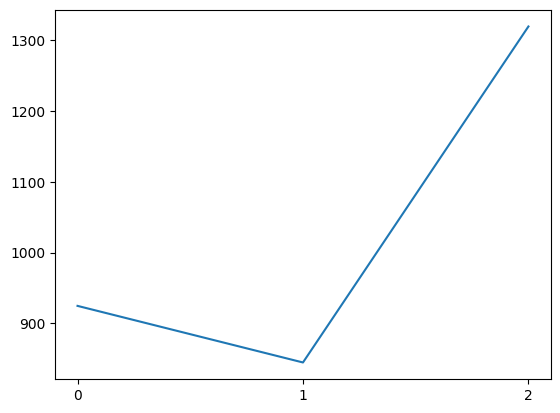

In [196]:
plt.plot(pd.merge(count, c[['item', 'major']], on='item').groupby('major')['count'].mean())
plt.xticks([0, 1, 2])

In [162]:
pd.merge(count, c[['item', 'major']], on='item')['count'].mean()

881.8873341813556

In [163]:
pd.merge(count, c[['item', 'major']], on='item')

,item,count,year,group_year,major
0,2571,19699,1999.0,1995.0,2
1,2959,18437,1999.0,1995.0,1
2,296,18202,1994.0,1990.0,1
3,318,18168,1994.0,1990.0,1
4,356,17339,1994.0,1990.0,1
...,...,...,...,...,...
5498,27751,39,2004.0,2000.0,1
5499,60007,39,1996.0,1995.0,0
5500,117881,38,2014.0,2010.0,2
5501,126,36,1994.0,1990.0,1


In [170]:
c.groupby('major').item.count()

major
0     876
1    4344
2     283
Name: item, dtype: int64

In [211]:
b = pd.merge(directors, years, on='item')[['director', 'year']]
pre, post = {}, {}
for g in directors.director.unique() :
    d = sorted(b[b.director == g].year.unique())
    if len(d) > 0 :
        half = (max(d) - min(d)) / 2 + min(d)
        pre[g] = [i for i in d if i < half]
        post[g] = [i for i in d if i >= half]
    else :
        pre[g] = []
        post[g] = []
pre, post

({'nm0000005': [1953,
   1955,
   1957,
   1958,
   1960,
   1961,
   1963,
   1966,
   1968,
   1969,
   1972,
   1973,
   1975],
  'nm0000019': [1953, 1954, 1957, 1960],
  'nm0000033': [1927,
   1929,
   1934,
   1935,
   1936,
   1938,
   1940,
   1941,
   1942,
   1943,
   1944,
   1945,
   1946,
   1948,
   1950,
   1951],
  'nm0000036': [1923, 1924, 1925],
  'nm0000037': [1949, 1952],
  'nm0000040': [1955, 1956, 1957, 1960, 1962, 1964, 1968, 1971, 1975],
  'nm0000041': [1948,
   1949,
   1950,
   1952,
   1954,
   1957,
   1958,
   1960,
   1961,
   1962,
   1963,
   1965],
  'nm0000045': [1972],
  'nm0000059': [1944, 1948],
  'nm0000076': [1959, 1960, 1961, 1966, 1968],
  'nm0000078': [1960],
  'nm0000080': [1941, 1942, 1946, 1947, 1952, 1955],
  'nm0000095': [1966,
   1969,
   1971,
   1972,
   1973,
   1975,
   1977,
   1978,
   1979,
   1980,
   1982,
   1983,
   1984,
   1985,
   1986,
   1987,
   1988,
   1989],
  'nm0000108': [1988, 1990, 1994, 1997, 1999],
  'nm0000110': 

In [212]:
c = pd.merge(directors, years, on='item')
count_direct = directors.groupby('item').director.count()
count_direct = count_direct[count_direct == 1]
c['period'] = c.apply(lambda x : 2 if x[0] not in count_direct.index else 0 if x[2] in pre[x[1]] else 1, axis=1)
c = c.groupby('item').period.max().to_frame().reset_index()
c

,item,period
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
5492,117881,2
5493,118696,1
5494,118900,1
5495,118997,1


In [213]:
pd.merge(count, c[['item', 'period']], on='item').groupby('period')['count'].mean()

period
0    1033.903868
1     683.544756
2    1319.257951
Name: count, dtype: float64

In [189]:
pd.merge(count, c[['item', 'period']], on='item')['count'].mean()

882.6887393123521

In [205]:
count['count'].sum()

5154471

feature 생성

In [3]:
train = pd.read_csv('train_ratings.csv')
directors = pd.read_csv('directors.tsv', sep='\t')
genres = pd.read_csv('genres.tsv', sep='\t')
titles = pd.read_csv('titles.tsv', sep='\t')
writers = pd.read_csv('writers.tsv', sep='\t')
years = pd.read_csv('years.tsv', sep='\t')

In [6]:
df = train['item'].value_counts().to_frame().reset_index()
df.columns = ['item', 'count']
df = pd.merge(df, titles, on='item', how='left')
df = pd.merge(df, years, on='item', how='left')
df['year'] = df['year'].fillna(-1)
df['year_5'] = df['year'].apply(lambda x : x // 5 * 5)
df

,item,count,title,year,year_5
0,2571,19699,"Matrix, The (1999)",1999.0,1995.0
1,2959,18437,Fight Club (1999),1999.0,1995.0
2,296,18202,Pulp Fiction (1994),1994.0,1990.0
3,318,18168,"Shawshank Redemption, The (1994)",1994.0,1990.0
4,356,17339,Forrest Gump (1994),1994.0,1990.0
...,...,...,...,...,...
6802,7259,38,You Got Served (2004),2004.0,2000.0
6803,126,36,"NeverEnding Story III, The (1994)",1994.0,1990.0
6804,4241,34,Pokémon 3: The Movie (2001),2001.0,2000.0
6805,2555,34,Baby Geniuses (1999),1999.0,1995.0


In [8]:
n_genre = genres.groupby('item').genre.count()
n_director = directors.groupby('item').director.count()
n_writer = writers.groupby('item').writer.count()
df['n_genre'] = df['item'].apply(lambda x : n_genre[x])
df['n_genre'] = df['n_genre'].fillna(0)
df['n_director'] = df['item'].apply(lambda x : n_director[x] if x in n_director.index else 0)
df['n_director'] = df['n_director'].fillna(0)
df['n_writer'] = df['item'].apply(lambda x : n_writer[x] if x in n_writer.index else 0)
df['n_writer'] = df['n_writer'].fillna(0)
df

,item,count,title,year,year_5,n_genre,n_director,n_writer
0,2571,19699,"Matrix, The (1999)",1999.0,1995.0,3,2,2
1,2959,18437,Fight Club (1999),1999.0,1995.0,4,1,2
2,296,18202,Pulp Fiction (1994),1994.0,1990.0,4,1,2
3,318,18168,"Shawshank Redemption, The (1994)",1994.0,1990.0,2,1,2
4,356,17339,Forrest Gump (1994),1994.0,1990.0,4,1,1
...,...,...,...,...,...,...,...,...
6802,7259,38,You Got Served (2004),2004.0,2000.0,2,0,0
6803,126,36,"NeverEnding Story III, The (1994)",1994.0,1990.0,3,1,2
6804,4241,34,Pokémon 3: The Movie (2001),2001.0,2000.0,2,0,0
6805,2555,34,Baby Geniuses (1999),1999.0,1995.0,1,1,1


In [9]:
temp = pd.merge(directors, genres, on='item')[['director', 'genre']].value_counts()
data = {}
data_without = {}
for tmp in directors.director.unique() :
    director = temp[tmp].index[0]
    data[tmp] = director
    if director == 'Drama' and len(temp[tmp].index) > 1 :
        data_without[tmp] = temp[tmp].index[1]
    else :
        data_without[tmp] = director
data, data_without

({'nm0000005': 'Drama',
  'nm0000019': 'Drama',
  'nm0000033': 'Thriller',
  'nm0000036': 'Comedy',
  'nm0000037': 'Musical',
  'nm0000040': 'Drama',
  'nm0000041': 'Drama',
  'nm0000045': 'Action',
  'nm0000059': 'Drama',
  'nm0000076': 'Drama',
  'nm0000078': 'Western',
  'nm0000080': 'Drama',
  'nm0000095': 'Comedy',
  'nm0000108': 'Action',
  'nm0000110': 'Drama',
  'nm0000114': 'Drama',
  'nm0000116': 'Action',
  'nm0000118': 'Sci-Fi',
  'nm0000122': 'Comedy',
  'nm0000123': 'Drama',
  'nm0000126': 'Western',
  'nm0000127': 'Horror',
  'nm0000134': 'Drama',
  'nm0000142': 'Drama',
  'nm0000149': 'Drama',
  'nm0000154': 'Drama',
  'nm0000158': 'Drama',
  'nm0000165': 'Drama',
  'nm0000169': 'Drama',
  'nm0000180': 'Drama',
  'nm0000184': 'Sci-Fi',
  'nm0000186': 'Drama',
  'nm0000200': 'Drama',
  'nm0000209': 'Drama',
  'nm0000217': 'Drama',
  'nm0000229': 'Drama',
  'nm0000230': 'Action',
  'nm0000231': 'Drama',
  'nm0000233': 'Thriller',
  'nm0000243': 'Drama',
  'nm0000247': 'Ac

In [10]:
a = pd.merge(directors, genres, on='item')
a['director_major'] = a.apply(lambda x : 1 if x[2] == data[x[1]] else 0, axis=1)
a = a.groupby(['item', 'director']).director_major.max().to_frame().reset_index()
a = a.groupby('item').director_major.mean().to_frame().reset_index()
a

,item,director_major
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
5498,118696,1.0
5499,118900,1.0
5500,118997,1.0
5501,119141,1.0


In [11]:
b = pd.merge(directors, genres, on='item')
b['director_major_drama_x'] = b.apply(lambda x : 1 if x[2] == data_without[x[1]] else 0, axis=1)
b = b.groupby(['item', 'director']).director_major_drama_x.max().to_frame().reset_index()
b = b.groupby('item').director_major_drama_x.mean().to_frame().reset_index()
b

,item,director_major_drama_x
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
5498,118696,1.0
5499,118900,0.0
5500,118997,1.0
5501,119141,1.0


In [12]:
df = pd.merge(df, a, on='item', how='left')
df = pd.merge(df, b, on='item', how='left')
df['director_major'] = df['director_major'].fillna(0)
df['bool_director_major'] = df['director_major'].apply(lambda x : 1 if x > 0 else 0)
df['pre_director_major'] = df['director_major'].apply(lambda x : 1 if x >= 0.6 else 0)
df['director_major_drama_x'] = df['director_major_drama_x'].fillna(0)
df['bool_director_major_drama_x'] = df['director_major_drama_x'].apply(lambda x : 1 if x > 0 else 0)
df['pre_director_major_drama_x'] = df['director_major_drama_x'].apply(lambda x : 1 if x >= 0.5 else 0)
df

,item,count,title,year,year_5,n_genre,n_director,n_writer,director_major,director_major_drama_x,bool_director_major,pre_director_major,bool_director_major_drama_x,pre_director_major_drama_x
0,2571,19699,"Matrix, The (1999)",1999.0,1995.0,3,2,2,1.0,1.0,1,1,1,1
1,2959,18437,Fight Club (1999),1999.0,1995.0,4,1,2,1.0,1.0,1,1,1,1
2,296,18202,Pulp Fiction (1994),1994.0,1990.0,4,1,2,1.0,1.0,1,1,1,1
3,318,18168,"Shawshank Redemption, The (1994)",1994.0,1990.0,2,1,2,1.0,1.0,1,1,1,1
4,356,17339,Forrest Gump (1994),1994.0,1990.0,4,1,1,1.0,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,7259,38,You Got Served (2004),2004.0,2000.0,2,0,0,0.0,0.0,0,0,0,0
6803,126,36,"NeverEnding Story III, The (1994)",1994.0,1990.0,3,1,2,1.0,1.0,1,1,1,1
6804,4241,34,Pokémon 3: The Movie (2001),2001.0,2000.0,2,0,0,0.0,0.0,0,0,0,0
6805,2555,34,Baby Geniuses (1999),1999.0,1995.0,1,1,1,1.0,1.0,1,1,1,1


In [13]:
temp = pd.merge(writers, genres, on='item')[['writer', 'genre']].value_counts()
data = {}
data_without = {}
for tmp in writers.writer.unique() :
    writer = temp[tmp].index[0]
    data[tmp] = writer
    if writer == 'Drama' and len(temp[tmp].index) > 1 :
        data_without[tmp] = temp[tmp].index[1]
    else :
        data_without[tmp] = writer
data, data_without

({'nm0000005': 'Drama',
  'nm0000019': 'Drama',
  'nm0000033': 'Thriller',
  'nm0000036': 'Comedy',
  'nm0000040': 'Drama',
  'nm0000041': 'Drama',
  'nm0000045': 'Action',
  'nm0000059': 'Drama',
  'nm0000076': 'Drama',
  'nm0000080': 'Drama',
  'nm0000092': 'Comedy',
  'nm0000095': 'Comedy',
  'nm0000100': 'Comedy',
  'nm0000101': 'Comedy',
  'nm0000108': 'Action',
  'nm0000110': 'Romance',
  'nm0000114': 'Drama',
  'nm0000116': 'Action',
  'nm0000118': 'Thriller',
  'nm0000120': 'Comedy',
  'nm0000122': 'Comedy',
  'nm0000123': 'Drama',
  'nm0000127': 'Horror',
  'nm0000131': 'Comedy',
  'nm0000154': 'Drama',
  'nm0000158': 'Drama',
  'nm0000160': 'Romance',
  'nm0000165': 'Drama',
  'nm0000175': 'Horror',
  'nm0000180': 'Drama',
  'nm0000184': 'Action',
  'nm0000186': 'Drama',
  'nm0000188': 'Comedy',
  'nm0000196': 'Comedy',
  'nm0000209': 'Drama',
  'nm0000217': 'Drama',
  'nm0000229': 'Drama',
  'nm0000230': 'Action',
  'nm0000231': 'Drama',
  'nm0000233': 'Thriller',
  'nm00002

In [14]:
a = pd.merge(writers, genres, on='item')
a['writer_major'] = a.apply(lambda x : 1 if x[2] == data[x[1]] else 0, axis=1)
a = a.groupby(['item', 'writer']).writer_major.max().to_frame().reset_index()
a = a.groupby('item').writer_major.mean().to_frame().reset_index()
a

,item,writer_major
0,1,0.857143
1,2,0.666667
2,3,0.000000
3,4,1.000000
4,5,1.000000
...,...,...
5643,118696,1.000000
5644,118900,0.000000
5645,118997,1.000000
5646,119141,1.000000


In [15]:
b = pd.merge(writers, genres, on='item')
b['writer_major_drama_x'] = b.apply(lambda x : 1 if x[2] == data_without[x[1]] else 0, axis=1)
b = b.groupby(['item', 'writer']).writer_major_drama_x.max().to_frame().reset_index()
b = b.groupby('item').writer_major_drama_x.mean().to_frame().reset_index()
b

,item,writer_major_drama_x
0,1,0.857143
1,2,0.666667
2,3,0.000000
3,4,1.000000
4,5,1.000000
...,...,...
5643,118696,1.000000
5644,118900,0.000000
5645,118997,1.000000
5646,119141,1.000000


In [16]:
c = pd.merge(df, a[['item', 'writer_major']], on='item')
for i in range(11) :
   c['pre_major'] = c['writer_major'].apply(lambda x : 1 if 0.1*i <= x else 0)
   print(f"{0.1*i}", c.groupby('pre_major')['count'].mean())

0.0 pre_major
1    857.255489
Name: count, dtype: float64
0.1 pre_major
0    736.879518
1    868.895728
Name: count, dtype: float64
0.2 pre_major
0    735.496994
1    869.055351
Name: count, dtype: float64
0.30000000000000004 pre_major
0    742.017544
1    868.768062
Name: count, dtype: float64
0.4 pre_major
0    755.943431
1    868.141569
Name: count, dtype: float64
0.5 pre_major
0    763.538879
1    867.427282
Name: count, dtype: float64
0.6000000000000001 pre_major
0    805.458145
1    866.866919
Name: count, dtype: float64
0.7000000000000001 pre_major
0    830.914232
1    863.348376
Name: count, dtype: float64
0.8 pre_major
0    826.853982
1    864.859230
Name: count, dtype: float64
0.9 pre_major
0    848.768840
1    859.499216
Name: count, dtype: float64
1.0 pre_major
0    856.635980
1    857.419803
Name: count, dtype: float64


In [17]:
c = pd.merge(df, b[['item', 'writer_major_drama_x']], on='item')
for i in range(11) :
   c['pre_major'] = c['writer_major_drama_x'].apply(lambda x : 1 if 0.1*i <= x else 0)
   print(f"{0.1*i}", c.groupby('pre_major')['count'].mean())

0.0 pre_major
1    857.255489
Name: count, dtype: float64
0.1 pre_major
0    688.344344
1    903.356773
Name: count, dtype: float64
0.2 pre_major
0    687.817657
1    903.549143
Name: count, dtype: float64
0.30000000000000004 pre_major
0    685.608980
1    904.794936
Name: count, dtype: float64
0.4 pre_major
0    680.800464
1    909.645006
Name: count, dtype: float64
0.5 pre_major
0    680.516949
1    909.992644
Name: count, dtype: float64
0.6000000000000001 pre_major
0    698.10548
1    925.61225
Name: count, dtype: float64
0.7000000000000001 pre_major
0    731.929638
1    919.586161
Name: count, dtype: float64
0.8 pre_major
0    735.659091
1    920.674300
Name: count, dtype: float64
0.9 pre_major
0    751.788277
1    914.142818
Name: count, dtype: float64
1.0 pre_major
0    756.960685
1    911.563592
Name: count, dtype: float64


In [18]:
df = pd.merge(df, a, on='item', how='left')
df = pd.merge(df, b, on='item', how='left')
df['writer_major'] = df['writer_major'].fillna(0)
df['bool_writer_major'] = df['writer_major'].apply(lambda x : 1 if x > 0 else 0)
df['pre_writer_major'] = df['writer_major'].apply(lambda x : 1 if x >= 0.2 else 0)
df['writer_major_drama_x'] = df['writer_major_drama_x'].fillna(0)
df['bool_writer_major_drama_x'] = df['writer_major_drama_x'].apply(lambda x : 1 if x > 0 else 0)
df['pre_writer_major_drama_x'] = df['writer_major_drama_x'].apply(lambda x : 1 if x >= 0.6 else 0)
df

,item,count,title,year,year_5,n_genre,n_director,n_writer,director_major,director_major_drama_x,bool_director_major,pre_director_major,bool_director_major_drama_x,pre_director_major_drama_x,writer_major,writer_major_drama_x,bool_writer_major,pre_writer_major,bool_writer_major_drama_x,pre_writer_major_drama_x
0,2571,19699,"Matrix, The (1999)",1999.0,1995.0,3,2,2,1.0,1.0,1,1,1,1,1.0,1.0,1,1,1,1
1,2959,18437,Fight Club (1999),1999.0,1995.0,4,1,2,1.0,1.0,1,1,1,1,1.0,1.0,1,1,1,1
2,296,18202,Pulp Fiction (1994),1994.0,1990.0,4,1,2,1.0,1.0,1,1,1,1,1.0,1.0,1,1,1,1
3,318,18168,"Shawshank Redemption, The (1994)",1994.0,1990.0,2,1,2,1.0,1.0,1,1,1,1,0.0,0.0,0,0,0,0
4,356,17339,Forrest Gump (1994),1994.0,1990.0,4,1,1,1.0,1.0,1,1,1,1,1.0,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,7259,38,You Got Served (2004),2004.0,2000.0,2,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0,0,0,0
6803,126,36,"NeverEnding Story III, The (1994)",1994.0,1990.0,3,1,2,1.0,1.0,1,1,1,1,1.0,1.0,1,1,1,1
6804,4241,34,Pokémon 3: The Movie (2001),2001.0,2000.0,2,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0,0,0,0
6805,2555,34,Baby Geniuses (1999),1999.0,1995.0,1,1,1,1.0,1.0,1,1,1,1,1.0,1.0,1,1,1,1


In [19]:
temp = pd.merge(directors, years, on='item')[['director', 'year']]
data_director = {}
for tmp in directors.director.unique() :
    d = sorted(temp[temp.director == tmp].year.unique())
    if len(d) >= 1 :
        data_director[tmp] = [min(d), max(d), max(d) - min(d)]
    else :
        data_director[tmp] = []
data_director

{'nm0000005': [1953, 2003, 50],
 'nm0000019': [1953, 1973, 20],
 'nm0000033': [1927, 1976, 49],
 'nm0000036': [1923, 1928, 5],
 'nm0000037': [1949, 1976, 27],
 'nm0000040': [1955, 1999, 44],
 'nm0000041': [1948, 1990, 42],
 'nm0000045': [1972, 1978, 6],
 'nm0000059': [1944, 1955, 11],
 'nm0000076': [1959, 1980, 21],
 'nm0000078': [1960, 1971, 11],
 'nm0000080': [1941, 1973, 32],
 'nm0000095': [1966, 2014, 48],
 'nm0000108': [1988, 2014, 26],
 'nm0000110': [1989, 2014, 25],
 'nm0000114': [1996, 2007, 11],
 'nm0000116': [1984, 2009, 25],
 'nm0000118': [1974, 2001, 27],
 'nm0000122': [1925, 1952, 27],
 'nm0000123': [2005, 2014, 9],
 'nm0000126': [1990, 2003, 13],
 'nm0000127': [1972, 2011, 39],
 'nm0000134': [1993, 2006, 13],
 'nm0000142': [1971, 2014, 43],
 'nm0000149': [1991, 2011, 20],
 'nm0000154': [1993, 2006, 13],
 'nm0000158': [1996, 2011, 15],
 'nm0000165': [1982, 2013, 31],
 'nm0000169': [2006, 2011, 5],
 'nm0000180': [1946, 1984, 38],
 'nm0000184': [1971, 2005, 34],
 'nm0000186'

In [20]:
temp = pd.merge(writers, years, on='item')[['writer', 'year']]
data_writer = {}
for tmp in writers.writer.unique() :
    d = sorted(temp[temp.writer == tmp].year.unique())
    if len(d) >= 1 :
        data_writer[tmp] = [min(d), max(d), max(d) - min(d)]
    else :
        data_writer[tmp] = []
data_writer

{'nm0000005': [1953, 2003, 50],
 'nm0000019': [1945, 1973, 28],
 'nm0000033': [1927, 1946, 19],
 'nm0000036': [1926, 1935, 9],
 'nm0000040': [1955, 1999, 44],
 'nm0000041': [1948, 1996, 48],
 'nm0000045': [1972, 1978, 6],
 'nm0000059': [1944, 1955, 11],
 'nm0000076': [1959, 1980, 21],
 'nm0000080': [1941, 1973, 32],
 'nm0000092': [1971, 2013, 42],
 'nm0000095': [1965, 2014, 49],
 'nm0000100': [1997, 2007, 10],
 'nm0000101': [1980, 1998, 18],
 'nm0000108': [1988, 2014, 26],
 'nm0000110': [1989, 1996, 7],
 'nm0000114': [1996, 2007, 11],
 'nm0000116': [1984, 2009, 25],
 'nm0000118': [1974, 2012, 38],
 'nm0000120': [1994, 2003, 9],
 'nm0000122': [1925, 1992, 67],
 'nm0000123': [2005, 2014, 9],
 'nm0000127': [1972, 2010, 38],
 'nm0000131': [1997, 2008, 11],
 'nm0000154': [2004, 2012, 8],
 'nm0000158': [1996, 2011, 15],
 'nm0000160': [2004, 2013, 9],
 'nm0000165': [1989, 1992, 3],
 'nm0000175': [1976, 2007, 31],
 'nm0000180': [1946, 1984, 38],
 'nm0000184': [1971, 2008, 37],
 'nm0000186': [1

In [21]:
a = pd.merge(directors, years, on='item')
a['director_year'] = a.apply(lambda x : x[2] - data_director[x[1]][0], axis=1)
a['director_period'] = a.apply(lambda x : 1 if (x[2] - data_director[x[1]][0]) / data_director[x[1]][2] >= 0.5 else 0, axis=1)

b = a.groupby('item')['director_year'].sum().to_frame().reset_index()
b = pd.merge(b, a.groupby('item')['director_period'].mean().to_frame().reset_index(), on='item')
b['director_year_10'] = b['director_year'].apply(lambda x : x // 10)
b

/tmp/ipykernel_64968/723962884.py:3: RuntimeWarning: invalid value encountered in long_scalars
  a['director_period'] = a.apply(lambda x : 1 if (x[2] - data_director[x[1]][0]) / data_director[x[1]][2] >= 0.5 else 0, axis=1)


,item,director_year,director_period,director_year_10
0,1,0,0.0,0
1,2,6,0.0,0
2,3,9,0.0,0
3,4,0,0.0,0
4,5,8,0.0,0
...,...,...,...,...
5492,117881,16,1.0,1
5493,118696,27,1.0,2
5494,118900,9,1.0,0
5495,118997,12,1.0,1


In [22]:
df = pd.merge(df, b, on='item', how='left')
df['director_year'] = df['director_year'].fillna(0)
df['director_period'] = df['director_period'].fillna(0)
df['director_year_10'] = df['director_year_10'].fillna(0)
df

,item,count,title,year,year_5,n_genre,n_director,n_writer,director_major,director_major_drama_x,...,pre_director_major_drama_x,writer_major,writer_major_drama_x,bool_writer_major,pre_writer_major,bool_writer_major_drama_x,pre_writer_major_drama_x,director_year,director_period,director_year_10
0,2571,19699,"Matrix, The (1999)",1999.0,1995.0,3,2,2,1.0,1.0,...,1,1.0,1.0,1,1,1,1,6.0,0.0,0.0
1,2959,18437,Fight Club (1999),1999.0,1995.0,4,1,2,1.0,1.0,...,1,1.0,1.0,1,1,1,1,7.0,0.0,0.0
2,296,18202,Pulp Fiction (1994),1994.0,1990.0,4,1,2,1.0,1.0,...,1,1.0,1.0,1,1,1,1,2.0,0.0,0.0
3,318,18168,"Shawshank Redemption, The (1994)",1994.0,1990.0,2,1,2,1.0,1.0,...,1,0.0,0.0,0,0,0,0,0.0,0.0,0.0
4,356,17339,Forrest Gump (1994),1994.0,1990.0,4,1,1,1.0,1.0,...,1,1.0,1.0,1,1,1,1,14.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,7259,38,You Got Served (2004),2004.0,2000.0,2,0,0,0.0,0.0,...,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0
6803,126,36,"NeverEnding Story III, The (1994)",1994.0,1990.0,3,1,2,1.0,1.0,...,1,1.0,1.0,1,1,1,1,6.0,1.0,0.0
6804,4241,34,Pokémon 3: The Movie (2001),2001.0,2000.0,2,0,0,0.0,0.0,...,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0
6805,2555,34,Baby Geniuses (1999),1999.0,1995.0,1,1,1,1.0,1.0,...,1,1.0,1.0,1,1,1,1,25.0,1.0,2.0


In [23]:
a = pd.merge(writers, years, on='item')
a['writer_year'] = a.apply(lambda x : x[2] - data_writer[x[1]][0], axis=1)
a['writer_period'] = a.apply(lambda x : 1 if (x[2] - data_writer[x[1]][0]) / data_writer[x[1]][2] >= 0.5 else 0, axis=1)

b = a.groupby('item')['writer_year'].sum().to_frame().reset_index()
b = pd.merge(b, a.groupby('item')['writer_period'].mean().to_frame().reset_index(), on='item')
b['writer_year_10'] = b['writer_year'].apply(lambda x : x // 10)
b

/tmp/ipykernel_64968/3451463788.py:3: RuntimeWarning: invalid value encountered in long_scalars
  a['writer_period'] = a.apply(lambda x : 1 if (x[2] - data_writer[x[1]][0]) / data_writer[x[1]][2] >= 0.5 else 0, axis=1)


,item,writer_year,writer_period,writer_year_10
0,1,11,0.0,1
1,2,0,0.0,0
2,3,2,0.0,0
3,4,7,0.0,0
4,5,155,1.0,15
...,...,...,...,...
5635,117881,16,1.0,1
5636,118696,123,1.0,12
5637,118900,17,1.0,1
5638,118997,23,1.0,2


In [24]:
df = pd.merge(df, b, on='item', how='left')
df['writer_year'] = df['writer_year'].fillna(0)
df['writer_period'] = df['writer_period'].fillna(0)
df['writer_year_10'] = df['writer_year_10'].fillna(0)
df

,item,count,title,year,year_5,n_genre,n_director,n_writer,director_major,director_major_drama_x,...,bool_writer_major,pre_writer_major,bool_writer_major_drama_x,pre_writer_major_drama_x,director_year,director_period,director_year_10,writer_year,writer_period,writer_year_10
0,2571,19699,"Matrix, The (1999)",1999.0,1995.0,3,2,2,1.0,1.0,...,1,1,1,1,6.0,0.0,0.0,8.0,0.0,0.0
1,2959,18437,Fight Club (1999),1999.0,1995.0,4,1,2,1.0,1.0,...,1,1,1,1,7.0,0.0,0.0,0.0,0.0,0.0
2,296,18202,Pulp Fiction (1994),1994.0,1990.0,4,1,2,1.0,1.0,...,1,1,1,1,2.0,0.0,0.0,4.0,0.0,0.0
3,318,18168,"Shawshank Redemption, The (1994)",1994.0,1990.0,2,1,2,1.0,1.0,...,0,0,0,0,0.0,0.0,0.0,25.0,0.5,2.0
4,356,17339,Forrest Gump (1994),1994.0,1990.0,4,1,1,1.0,1.0,...,1,1,1,1,14.0,0.0,1.0,15.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,7259,38,You Got Served (2004),2004.0,2000.0,2,0,0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6803,126,36,"NeverEnding Story III, The (1994)",1994.0,1990.0,3,1,2,1.0,1.0,...,1,1,1,1,6.0,1.0,0.0,14.0,1.0,1.0
6804,4241,34,Pokémon 3: The Movie (2001),2001.0,2000.0,2,0,0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6805,2555,34,Baby Geniuses (1999),1999.0,1995.0,1,1,1,1.0,1.0,...,1,1,1,1,25.0,1.0,2.0,17.0,1.0,1.0


In [25]:
a = pd.merge(directors, writers, on='item')
a = a[a.director == a.writer]
a

,item,director,writer
0,1237,nm0000005,nm0000005
1,5147,nm0000005,nm0000005
2,7327,nm0000005,nm0000005
3,2068,nm0000005,nm0000005
4,7396,nm0000005,nm0000005
...,...,...,...
11995,89039,nm2648685,nm2648685
11996,112804,nm2648685,nm2648685
12002,84273,nm2879822,nm2879822
12003,58376,nm2879822,nm2879822


In [26]:
df['director_writer_same'] = df['item'].apply(lambda x : 1 if x in a.item else 0)
df

,item,count,title,year,year_5,n_genre,n_director,n_writer,director_major,director_major_drama_x,...,pre_writer_major,bool_writer_major_drama_x,pre_writer_major_drama_x,director_year,director_period,director_year_10,writer_year,writer_period,writer_year_10,director_writer_same
0,2571,19699,"Matrix, The (1999)",1999.0,1995.0,3,2,2,1.0,1.0,...,1,1,1,6.0,0.0,0.0,8.0,0.0,0.0,0
1,2959,18437,Fight Club (1999),1999.0,1995.0,4,1,2,1.0,1.0,...,1,1,1,7.0,0.0,0.0,0.0,0.0,0.0,0
2,296,18202,Pulp Fiction (1994),1994.0,1990.0,4,1,2,1.0,1.0,...,1,1,1,2.0,0.0,0.0,4.0,0.0,0.0,1
3,318,18168,"Shawshank Redemption, The (1994)",1994.0,1990.0,2,1,2,1.0,1.0,...,0,0,0,0.0,0.0,0.0,25.0,0.5,2.0,1
4,356,17339,Forrest Gump (1994),1994.0,1990.0,4,1,1,1.0,1.0,...,1,1,1,14.0,0.0,1.0,15.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,7259,38,You Got Served (2004),2004.0,2000.0,2,0,0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
6803,126,36,"NeverEnding Story III, The (1994)",1994.0,1990.0,3,1,2,1.0,1.0,...,1,1,1,6.0,1.0,0.0,14.0,1.0,1.0,0
6804,4241,34,Pokémon 3: The Movie (2001),2001.0,2000.0,2,0,0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
6805,2555,34,Baby Geniuses (1999),1999.0,1995.0,1,1,1,1.0,1.0,...,1,1,1,25.0,1.0,2.0,17.0,1.0,1.0,0


In [27]:
df.to_csv('items.csv', index=False)